# Lab 08 - Handling Missing Values - Florentin Degbo

### Introduction
- What are missing values?
1. Real-world datasets are rarely clean and homogeneous,
2. Most of the dataset conain missing values,
3. Misiing values are the values that are either not collected or non-existent,
4. The general term for missing values is NA (not available),
5. Types of NA:
   - null: any piece of data that is not define,
   - None: any Python object that is missing in a code,
   - NaN: not a number which indicates a missing NumPy value
6. The most known missing values are the NaN format. 

### Importing Libairies

In [4]:
# general librairies
import numpy as np
import pandas as pd
import math

# data visualiztion librairies
import matplotlib.pyplot as plt
import seaborn as sns 

# suppressing warnings
import warnings 
warnings.filterwarnings('ignore')

In [5]:
# 1. None
a = None 
a

In [6]:
type(a)

NoneType

In [7]:
print(a)

None


In [8]:
# let's use None in a np array
b = np.array([3, None, 5])
b

array([3, None, 5], dtype=object)

In [9]:
# 2. NaN
c = np.array([6, 9, np.nan, 10])
c

array([ 6.,  9., nan, 10.])

In [10]:
# using NaN and None in a pandas Series
d = pd.Series([3, None, 5, 'Degbo', np.nan])
d

0        3
1     None
2        5
3    Degbo
4      NaN
dtype: object

### Strategies in Handling Missing Values
- There are 3 main strategies in handling missing values:
1. Deleting missing values: 3 ways in deleting missing values using the dropna() method:
   - A) dropna(): with no parameter: deleting every missing value iin the dataset.
   - B) dropna(axis=0): deleting every row with missing values.
   - C) dropna(axis=1): deleting every column with missing values.
3. Imputing missing values: Filling either numeric missing values or non-numeric missing values:
   - A) numeric: fillna() with either mean() or median().
If we have outliers in a variable it is safer to fill missing values with the median() of the variable since the median() is less sensitive to the outliers.
    - B) non-numeric missing values: we can fill the missing values wiht the most frequent values or 'no info'.
5. Using a model: The most popular models in filling the missing values are regression or KNN. However, filling the missing values with a model can rsult in the model to be overfit.

### Loading the Dataset

In [13]:
# let's load the datasset
df = pd.read_csv('titanic.csv')

In [14]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [15]:
# let's make a copy of the dataset
titanic = df.copy()

In [16]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [17]:
# shape of the dataset
titanic.shape

(891, 12)

In [18]:
# info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# statistical summary: only for numeric variables
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [20]:
# summary of the object variables
titanic.describe(include= 'object')

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [21]:
# let's check the missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Strategy # 1: Deleting missing values:**

In [23]:
titanic1 = titanic.copy()

In [24]:
# deleting any missing values in the dataset
titanic1.dropna(inplace=True)

In [25]:
titanic1.shape

(183, 12)

In [26]:
titanic2 = titanic.copy()

In [27]:
# let's delete only the rows with missing values
titanic2.dropna(axis=0, inplace=True)

In [28]:
titanic2.shape

(183, 12)

In [29]:
titanic3 = titanic.copy()

In [30]:
# let's delete only the columns that contains missing values
titanic3.dropna(axis=1, inplace=True)

In [31]:
titanic3.shape

(891, 9)

In [32]:
titanic3.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare  
0         A/5 21171   7.2500  
1          PC 17599  71.2833  
2  STON/O2. 3101282   7.9250  
3            113803  53.1000  
4            373450   8.0500

**Strategy for dropping a column with missing values**
- if a column contains more than 65% missing values,
- and it is NOT a critical variable,
- and it does NOT make any difference in the model performance,
- we can drop that column.``

In [34]:
# let's check the percentage of the missing values in each column
titanic.isnull().sum() * 100 / len(titanic)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Dropping a column with more than 65% missing value
- The 'cabin' variable in this dataset has 77% of missing values,
- It does NOT affect the performance of the model in the rate of passenger's survival. 

In [36]:
# let's drop the cabin column
titanic4 = titanic.copy()

In [37]:
titanic4.drop('Cabin', axis= 1, inplace=True)

In [38]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**Strategy # 2 : Imputing missing values:**
1. numeric values: either mean() or median()

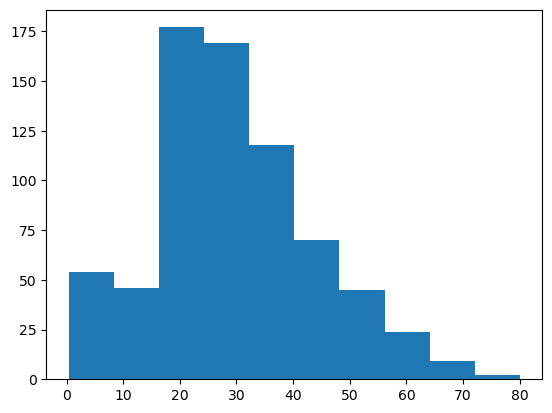

In [40]:
# let's check the 'Age' variable for outliers
plt.hist(titanic4['Age']);

In [41]:
# 1. let's fill the missing values with median()
titanic4['Age'] = titanic4["Age"].fillna(titanic4['Age'].median())

In [42]:
titanic4.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

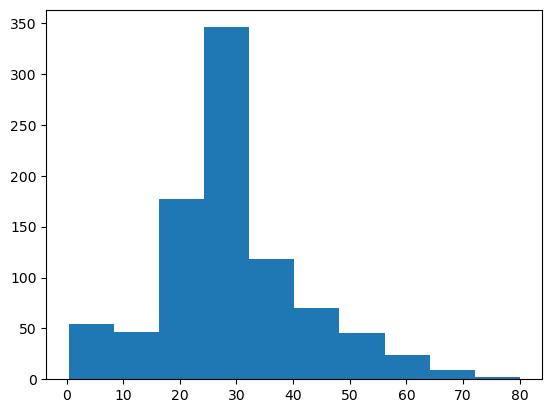

In [43]:
plt.hist(titanic4['Age']);

In [44]:
# 2. let's fill the missing values with mean()
titanic4['Age'] = titanic4["Age"].fillna(titanic4['Age'].mean())

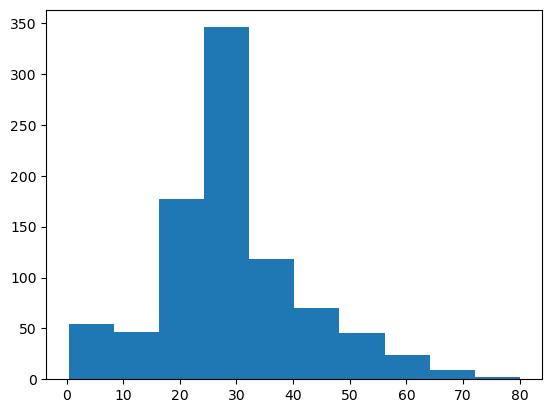

In [45]:
plt.hist(titanic4['Age']);

**Observation**
- Since the Age variable does not have any outliers, filling the missing values with median() or mean() is not affecting the data ditributions=after imputing the missing values. 

In [47]:
titanic4.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [48]:
# let's examine 'Embarked' variable with missing values: 
# 1. Embarked is a categorical variable 
titanic4['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [49]:
# impute the 2 missing values with the most frequent value which is S 
#titanic4['Embarked'].fillna('S', inplace=True)

In [50]:
# we can also fill the misisng values with the 'no info' teext.
titanic4['Embarked'].fillna('no info', inplace=True)

In [51]:
titanic4['Embarked'].value_counts()

Embarked
S          644
C          168
Q           77
no info      2
Name: count, dtype: int64

In [52]:
titanic4.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Conclusion
- Add 25 points
1. The 'Embarked' column was processed to handle missing values. 
2. Four categories emerged in 'Embarked': 'S,' 'C,' 'Q,' and 'no info.'
3. 'no info' was introduced as a placeholder for missing values.
4. Value counts for 'Embarked' confirmed: 'S' = 644, 'C' = 168, 'Q' = 77, and 'no info' = 2.
5. The .fillna() method was used effectively to fill missing values.
6. The inplace=True parameter ensured changes were made directly to the dataset .
7. The .isnull().sum() method confirmed zero missing values in all columns.
8. Columns such as 'PassengerId,' 'Survived,' and 'Pclass' retained completeness with no nulls.
9. Numerical columns like 'Age' and 'Fare' were fully preserved without any missing entries.
10. Categorical columns like 'Sex' and 'Embarked' were fully cleaned of missing values.
11. Placeholder values ('no info') ensured consistency and enabled smooth analysis.
12. The replacement of missing values avoided potential analytical errors.
13. Using .fillna() streamlined the data preprocessing step.
14. Missing values were efficiently addressed without distorting dataset integrity.
15. The cleaned dataset was confirmed to be free of null values, making it analyzable.
16. The 'Embarked' column's categories and their counts provided insight into passenger distribution.
17. The use of 'no info' as a placeholder allowed missing values to be flagged during analysis.
18. Missing values were handled within both categorical and numerical data types effectively.
19. The dataset was rendered ready for exploratory data analysis (EDA).
20. Proper handling of missing values highlighted the importance of preprocessing in data science.
21. Cleaning the 'Embarked' column showcased the practical application of Pandas functions.
22. Data consistency was maintained, critical for further insights and model accuracy.
23. The lab provided a hands-on example of data cleaning and handling null entries.
24. Data preprocessing steps, like filling missing values, are foundational for any analysis.
25. The lab concluded with a clean dataset, setting the stage for meaningful insights.

#### End of Lab 08